In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()


# Read in the csv file
chicago = pd.read_csv("chi_marathon.csv")

chicago.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,Treadmill Running,5/3/19,Treadmill Running,1.30,103,0:11:12,158,185,2.3,156,...,0,0,0:00,0:00,77.0,0:00,No,04:02.7,2,0
1,Treadmill Running,5/6/19,Treadmill Running,1.16,71,08:54.2,139,154,1.6,164,...,0,0,0:00,0:00,77.0,0:00,No,01:37.7,2,0
2,Running,5/15/19,Chicago Running,2.00,135,0:16:40,142,159,2.2,172,...,0,0,0:00,0:00,68.0,0:00,No,00:01.1,3,0
3,Running,5/15/19,Chicago Running,1.01,80,08:49.4,152,164,2.1,167,...,0,0,0:00,0:00,73.4,0:00,No,00:03.6,2,0
4,Treadmill Running,5/16/19,Treadmill Running,1.01,73,07:58.7,155,162,2.1,171,...,0,0,0:00,0:00,75.2,0:00,No,00:04.9,2,0


In [10]:
# As you can see, there are 122 activiteis logged, and 28 columns with descriptive information for use (the first column doesnt count)

print(chicago.shape)

print(pd.value_counts(chicago.iloc[:,3:].values.ravel()))


(122, 29)
0          732
0:00       366
--         124
No         122
2           38
          ... 
0:17:02      1
9:16         1
62           1
16:09        1
0:42:58      1
Length: 756, dtype: int64


# Plotting the data

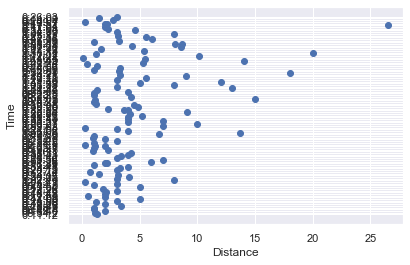

In [16]:
plt.scatter(chicago['Distance'],chicago['Time'])
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()


# Clustering

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Add these lines to turn off the warnings
import warnings
warnings.filterwarnings("ignore")

train = pd.io.parsers.read_csv("chi_marathon.csv")
test = pd.io.parsers.read_csv('chi_marathon-Copy1.csv')

train = train.dropna(axis=0)

train_Y = train.Distance
train_predictor_columns = ['Distance', 'Time', 'Avg HR', 'Min Temp']
train_X = train[train_predictor_columns]
test_X = test[train_predictor_columns]

### label encode the categorical values and convert them to numbers 
le = LabelEncoder()
le.fit(train_X['Distance'].astype(str))
train_X['Distance'] = le.transform(train_X['Distance'].astype(str))
test_X['Distance'] = le.transform(test_X['Distance'].astype(str))

le.fit(train_X['Time'].astype(str))
train_X['Time'] = le.transform(train_X['Time'].astype(str))
test_X['Time'] = le.transform(test_X['Time'].astype(str))

### train the model 
my_model = RandomForestRegressor()
my_model.fit(train_X, train_Y)


## fill the missing values in test data
for col in train_predictor_columns:
    mean_col = sum(train_X[col]) / len(train_X[col])
    test_X[col] = test_X[col].fillna(mean_col)

predictions = my_model.predict(test_X)
print(predictions)

[ 1.282  1.133  2.001  1.01   0.89   3.434  2.017  1.269  3.01   4.964
  2.01   0.601  2.018  2.05   3.033  1.694  5.006  1.078  3.036  0.295
  7.882  2.928  4.03   3.079  1.53   0.723  3.031  3.263  4.013  1.01
  2.01   6.099  6.917  3.011  3.352  4.01   4.272  1.013  2.209  1.01
  2.01   0.301  1.008  3.005  2.009  0.861  1.01   6.503  2.164 13.266
  4.013  3.009  0.283  6.979  9.175  4.01   7.049  4.016  3.902  5.248
  4.081  9.052  3.851  2.377  4.798  4.448  1.227  1.033  1.156 14.226
  4.17   3.976  1.01   1.017  4.01   1.337 12.956  3.017  7.683  4.973
 11.575  3.004  5.546  8.755  3.287 17.113  3.164  0.944  3.265  1.369
  0.362  5.268 14.914  5.459  0.228  9.337  1.224 19.02   5.43   1.581
  8.401  4.313  8.252  1.072  3.221  5.998  5.588  8.622  3.132  8.123
  3.011  4.465  2.213  2.009 21.706  2.009  0.35   2.184  2.638  1.13
  1.385  3.053]


In [28]:
print(pd.value_counts(chicago.iloc[:,5:].values.ravel()))


0          732
0:00       366
--         124
No         122
2           35
          ... 
03:04.1      1
9:16         1
0:17:02      1
08:49.4      1
9:30         1
Length: 585, dtype: int64


In [29]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(chicago.iloc[:, 5:])

labels = kmeans_model.labels_

print(pd.crosstab(labels, chicago["Distance"]))

ValueError: could not convert string to float: '00:25.4'